Análise de Dados de Fatura de Cartão de Crédito

Insights com a Análise Exploratória:

* Quais categorias consomem a maior parte das suas despesas?
* Como suas despesas variam ao longo do tempo?
* Identificar o dia com mais gastos?
* Titulares com mais gastos?

Lógica da Aplicação:
* 1 - Ler e usar as bibliotecas necessárias
* 2 - Ler e orgnizar a base de dados (cartao.csv)
* 3 - Iniciar o processo de análise de dados
* 4 - Gerar Gráficos 





Passo 01: Ler as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Passo 02: Ler a base e organizá-la

In [2]:
dados = pd.read_csv('fatura.csv')
# Exibe informações sobre o DataFrame: dados.info()
dados.head()

,Nome,NumeroCartao,data_compra,hora_compra,categoria,estabelecimento,ValorCompra
0,Ana,4745654042586681,2024-05-08,18:46:33,Vestuário,Loja de Roupas,53.21
1,Carlos,374149440690652,2024-04-22,03:00:47,Farmácia,Loja de Suplementos,159.70
2,Carlos,374149440690652,2024-05-16,22:19:36,Lazer,Show,114.56
3,Maria,374604561384428,2024-05-06,01:13:57,Mercado,Supermercado,101.21
4,Joao,2298930723413634,2024-04-18,02:08:58,Mercado,Mercado,32.03


Passo 03: Iniciar o processo de análise de dados (cartao.csv)

- Valor total da Fatura:

In [3]:
valor_total_cartao = dados['ValorCompra'].sum()
#print(f"{valor_total_cartao}")
print(f"{valor_total_cartao:.2f}")

14811.75


Passo 03: Iniciar o processo de análise de dados (cartao.csv)

- Valor gasto por Titular:

In [4]:
# Calcular o valor gasto por titular
valor_gasto_por_titular = dados.groupby('Nome')['ValorCompra'].sum()
valor_gasto_por_titular = dados.groupby('Nome')['ValorCompra'].sum().reset_index().sort_values(by='ValorCompra',ascending=False)
valor_gasto_por_titular

,Nome,ValorCompra
0,Ana,5763.10
1,Carlos,3701.59
3,Maria,2784.91
2,Joao,2562.15


Passo 03: Iniciar o processo de análise de dados (cartao.csv)

- Valor gasto por Categoria:

In [5]:
# Calcular o valor gasto por categoria
valor_gasto_por_categoria = dados.groupby('categoria')['ValorCompra'].sum().reset_index().sort_values(by='ValorCompra',ascending=False)
valor_gasto_por_categoria

,categoria,ValorCompra
0,Alimentação,2460.06
1,Eletrônicos,2350.01
5,Transporte,2186.05
7,Viagem,1893.79
6,Vestuário,1739.94
2,Farmácia,1714.60
4,Mercado,1495.00
3,Lazer,972.30


Passo 03: Iniciar o processo de análise de dados (cartao.csv)

- Dias que mais ocorreram gastos:

In [7]:
gastos_por_dia = dados.groupby('data_compra')['ValorCompra'].sum().reset_index()
gastos_por_dia = gastos_por_dia.sort_values(by='data_compra',ascending=True)
gastos_por_dia
gastos_por_dia.head(5)

,data_compra,ValorCompra
0,2024-04-01,455.73
1,2024-04-02,486.65
2,2024-04-03,153.34
3,2024-04-04,239.86
4,2024-04-05,569.11


Passo 04: Gerar os Gráficos Financeiros.

- Gastos por Pessoa/titular

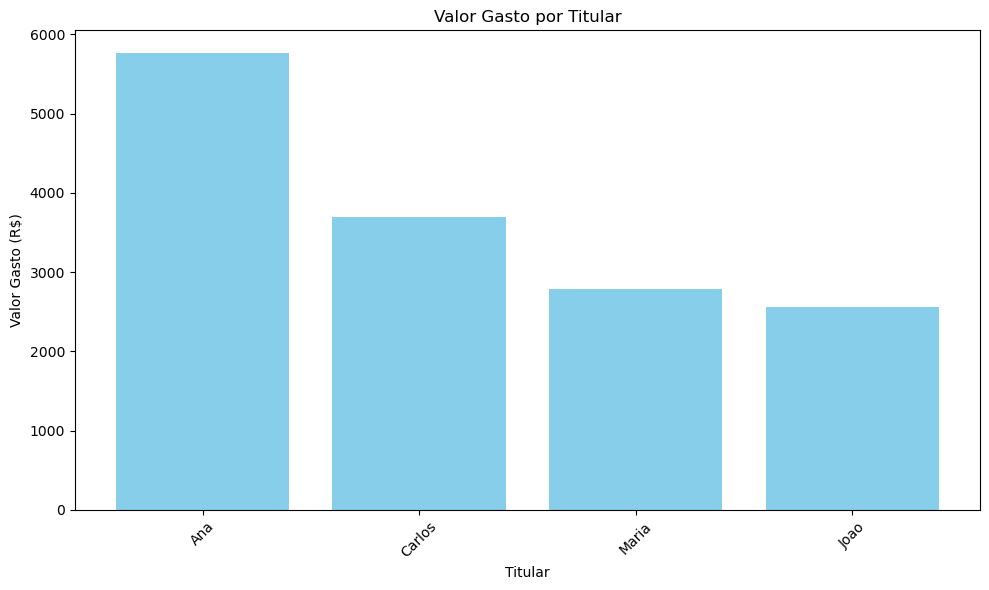

In [8]:
# Gráfico de valor gasto por titular
plt.figure(figsize=(10, 6))
plt.bar(valor_gasto_por_titular['Nome'], valor_gasto_por_titular['ValorCompra'], color='skyblue')
plt.title('Valor Gasto por Titular')
plt.xlabel('Titular')
plt.ylabel('Valor Gasto (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Passo 04: Gerar os Gráficos Financeiros.

- Gastos por categoria

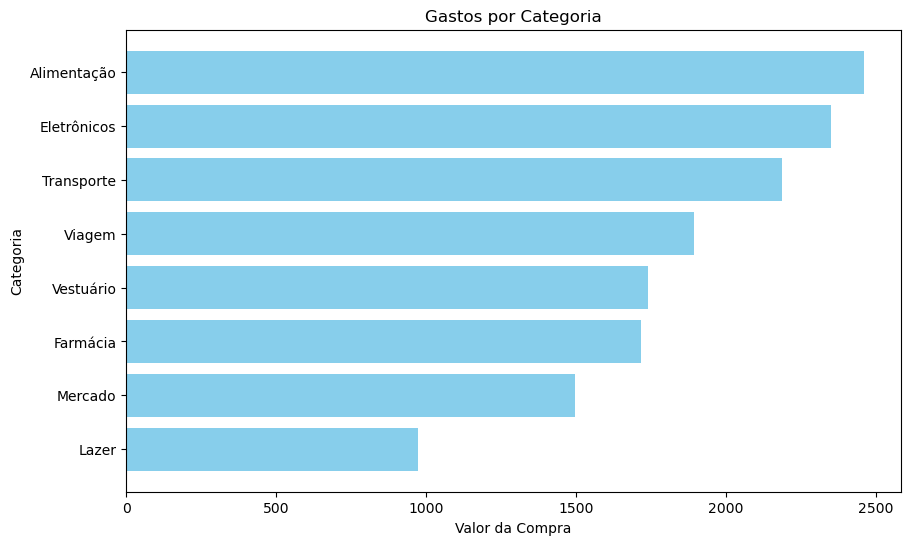

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(valor_gasto_por_categoria['categoria'], valor_gasto_por_categoria['ValorCompra'], color='skyblue')
plt.xlabel('Valor da Compra')
plt.ylabel('Categoria')
plt.title('Gastos por Categoria')
plt.gca().invert_yaxis()  # Inverte o eixo para mostrar as categorias de maior valor no topo
plt.show()

Passo 04: Gerar os Gráficos Financeiros.

- Gastos por Titular

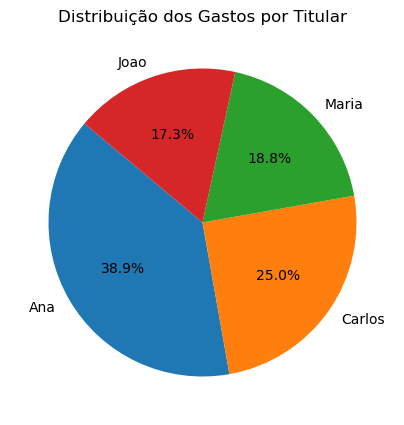

In [10]:
# Criar o gráfico de pizza
plt.figure(figsize=(5, 5))
plt.pie(valor_gasto_por_titular['ValorCompra'], labels=valor_gasto_por_titular['Nome'], autopct='%1.1f%%', startangle=140)
# Título do gráfico
plt.title('Distribuição dos Gastos por Titular')
# Mostrar o gráfico
gastos_titular = plt.show()


Passo 04: Gerar os Gráficos Financeiros.

- Gastos por mês

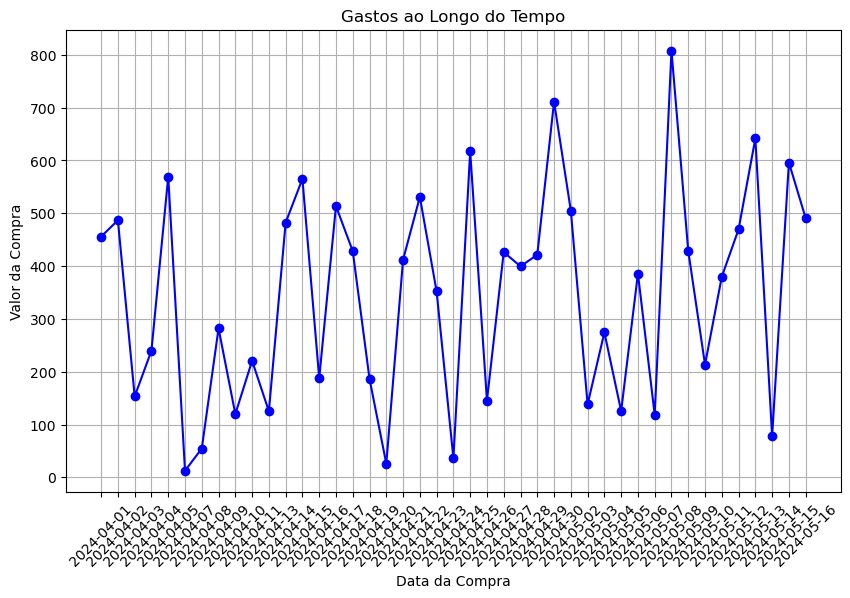

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(gastos_por_dia['data_compra'], gastos_por_dia['ValorCompra'], marker='o', linestyle='-', color='b')

# Adicionar título e rótulos aos eixos
plt.title('Gastos ao Longo do Tempo')
plt.xlabel('Data da Compra')
plt.ylabel('Valor da Compra')

# Rotacionar as datas no eixo X para melhor visualização
plt.xticks(rotation=45)
 
# Mostrar o gráfico
plt.grid(True)
plt.show() 